In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/payments/'

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# r_payments = pd.read_csv(f'{PATH}payments.csv', low_memory=False)
# payments = r_payments.loc[r_payments['facility'] == 500140].copy()
# payments.reset_index(inplace=True)

payments = pd.read_csv(f'{PATH}payments.csv', low_memory=False).sort_values(by=['facility', 'date'])


In [4]:
from IPython.display import HTML, display

In [5]:
payments['amount'] = np.round(payments['amount'])


In [6]:
payment_cities = payments['city'].unique()
payment_cities

array(['Oosterhout', 'Amsterdam', 'Veenendaal', 'Gouda', 'Rotterdam', 'Enschede', 'Roosendaal', 'Utrecht',
       'Hengelo', 'Amersfoort', 'Apeldoorn', 'Deventer', 'Breda', 'Nijmegen', 'Naarden', 'Ede', 'Zwolle',
       'Amstelveen', 'Ridderkerk', 'Emmen', ..., 'Woerden', 'Sittard', 'Oisterwijk', 'Den Haag', 'Boxtel',
       'Heerenveen', 'Schiedam', 'Eindhoven', 'Gorinchem', 'Nieuwegein', 'Valkenburg aan de Geul', 'Zutphen',
       'Beverwijk', 'Zwijndrecht', 'Hoofddorp', 'Sneek', 'Driebergen-Rijsenburg', 'Zaandam', 'Weert',
       'Heerlen'], dtype=object)

In [7]:
nl_cities = pd.read_csv(f'{PATH}nl_cities.csv')

In [8]:
payments = payments.merge(nl_cities, 'left', ['city'])

In [9]:
payments[payments.isnull().any(axis=1)].city.unique()

array([], dtype=object)

In [10]:
import time
import datetime

holidays = ['2018-01-01',
            '2018-03-30',
            '2018-04-01',
            '2018-04-02',
            '2018-04-27',
            '2018-05-05',
            '2018-05-10',
            '2018-05-20',
            '2018-05-21',
            '2018-12-25',
            '2018-12-26'
           ]

payments['holiday'] = 0

for d in holidays:
    payments.loc[payments['date'] == d, 'holiday'] = 1
  

In [11]:
display(DataFrameSummary(payments).summary())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday
count,18972,NaN,NaN,NaN,NaN,NaN,18972,NaN,18972
mean,502992,NaN,NaN,NaN,NaN,NaN,2446.8,NaN,0.0429053
std,2180.13,NaN,NaN,NaN,NaN,NaN,4165.64,NaN,0.202649
min,500140,NaN,NaN,NaN,NaN,NaN,1,NaN,0
25%,501445,NaN,NaN,NaN,NaN,NaN,182,NaN,0
50%,502377,NaN,NaN,NaN,NaN,NaN,683,NaN,0
75%,504092,NaN,NaN,NaN,NaN,NaN,2858,NaN,0
max,510842,NaN,NaN,NaN,NaN,NaN,67192,NaN,1
counts,18972,18972,18972,18972,18972,18972,18972,18972,18972
uniques,108,182,58,1,3,5,6071,3,2


In [12]:
nl_school_holidays = pd.read_csv(f'{PATH}nl_school_holidays.csv')
nl_school_holidays



,region,begin,end
0,North,2017-12-23,2018-01-07
1,South,2017-12-23,2018-01-07
2,Middle,2017-12-23,2018-01-07
3,North,2018-02-24,2018-03-04
4,Middle,2018-02-24,2018-03-04
5,South,2018-02-17,2018-02-25
6,North,2018-04-28,2018-06-06
7,Middle,2018-04-28,2018-06-06
8,South,2018-04-28,2018-06-06
9,North,2018-07-21,2018-09-02


In [13]:
payments['school_holiday'] = 0

for [r, b, e] in nl_school_holidays.values:
    payments.loc[(payments["region"] == r) & (payments["date"] >= b) & (payments["date"] <= e), "school_holiday"] = 1


In [14]:
display(DataFrameSummary(payments).summary())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,school_holiday
count,18972,NaN,NaN,NaN,NaN,NaN,18972,NaN,18972,18972
mean,502992,NaN,NaN,NaN,NaN,NaN,2446.8,NaN,0.0429053,0.459045
std,2180.13,NaN,NaN,NaN,NaN,NaN,4165.64,NaN,0.202649,0.498333
min,500140,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0
25%,501445,NaN,NaN,NaN,NaN,NaN,182,NaN,0,0
50%,502377,NaN,NaN,NaN,NaN,NaN,683,NaN,0,0
75%,504092,NaN,NaN,NaN,NaN,NaN,2858,NaN,0,1
max,510842,NaN,NaN,NaN,NaN,NaN,67192,NaN,1,1
counts,18972,18972,18972,18972,18972,18972,18972,18972,18972,18972
uniques,108,182,58,1,3,5,6071,3,2,2


In [15]:
add_datepart(payments, "date", drop=False)

In [16]:
# throw away last few days
# from datetime import datetime, timedelta
# max_date = payments['date'].max()
# max_date = max_date - timedelta(days=3)

# payments = payments.loc[payments.date < max_date]
# payments.reset_index(inplace=True)


In [17]:
import datetime
import calendar

def week_of_month(tgtdate):
    #tgtdate = tgtdate.to_datetime()

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.datetime(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we can use the modulo 7 appraoch
    mod = (tgtdate - startdate).days //7 + 1
    return max(mod, 1)

payments['wom'] = payments['date'].apply(week_of_month)

In [18]:
display(payments.head())

,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,school_holiday,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,wom
0,500140,2018-03-14,Oosterhout,ACities,Multifunction,Combination,1268.0,South,0,0,...,2,73,False,False,False,False,False,False,1520985600,2
1,500140,2018-03-15,Oosterhout,ACities,Multifunction,Combination,1119.0,South,0,0,...,3,74,False,False,False,False,False,False,1521072000,2
2,500140,2018-03-16,Oosterhout,ACities,Multifunction,Combination,2461.0,South,0,0,...,4,75,False,False,False,False,False,False,1521158400,2
3,500140,2018-03-17,Oosterhout,ACities,Multifunction,Combination,2986.0,South,0,0,...,5,76,False,False,False,False,False,False,1521244800,2
4,500140,2018-03-18,Oosterhout,ACities,Multifunction,Combination,31.0,South,0,0,...,6,77,False,False,False,False,False,False,1521331200,2


In [19]:
len(payments)

18972

In [21]:
columns = ["date", "facility", "holiday", "school_holiday"]    
df = payments[columns]

In [22]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.facility.values,df[fld].values, df.date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res
    



In [23]:


fld = 'holiday'
df = df.sort_values(['facility', 'date'])
get_elapsed(fld, 'after_')
df = df.sort_values(['facility', 'date'], ascending=[True, False])
get_elapsed(fld, 'before_')

fld = 'school_holiday'
df = df.sort_values(['facility', 'date'])
get_elapsed(fld, 'after_')
df = df.sort_values(['facility', 'date'], ascending=[True, False])
get_elapsed(fld, 'before_')


# We're going to set the active index to Date.
df = df.set_index("date")

# Then set null values from elapsed field calculations to 0.
columns = ['holiday', 'school_holiday']
for o in ['before_', 'after_']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

# rolling quantities        
bwd = df[['facility']+columns].sort_index().groupby("facility").rolling(7, min_periods=1).sum()        
fwd = df[['facility']+columns].sort_index(ascending=False).groupby("facility").rolling(7, min_periods=1).sum()

# drop the facility indices grouped together in the window function
bwd.drop('facility',1,inplace=True)
bwd.reset_index(inplace=True)
fwd.drop('facility',1,inplace=True)
fwd.reset_index(inplace=True)





In [24]:
df.reset_index(inplace=True)

df = df.merge(bwd, 'left', ['date', 'facility'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['date', 'facility'], suffixes=['', '_fw'])
df.drop(columns,1,inplace=True)


# payments.reset_index(inplace=True)
# payments = payments.merge(bwd, 'left', ['date', 'facility'], suffixes=['', '_bw'])
# payments = payments.merge(fwd, 'left', ['date', 'facility'], suffixes=['', '_fw'])
# payments.drop(columns,1,inplace=True)
# display(payments.columns)

18848

In [25]:
len(df)

20052

In [26]:
len(df.drop_duplicates())

18848

In [27]:

df = df.drop_duplicates()
df.reset_index(inplace=True)


In [28]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [29]:
payments = join_df(payments, df, ['facility', 'date'])

#######
### why do we have duplicates??????

# payments = payments.drop_duplicates()



In [30]:
payments.reset_index(inplace=True)

In [31]:
display(payments[payments.date == '2018-04-28'])

,level_0,facility,date,city,city_type,facility_purpose,facility_type,amount,region,holiday,...,wom,index,after_holiday,before_holiday,after_school_holiday,before_school_holiday,holiday_bw,school_holiday_bw,holiday_fw,school_holiday_fw
44,44,500140,2018-04-28,Oosterhout,ACities,Multifunction,Combination,2862.0,South,0,...,4,109,1,-7,0,0,1.0,1.0,0.0,7.0
198,198,500165,2018-04-28,Amsterdam,ACities,Multifunction,Combination,7025.0,North,0,...,4,287,1,-7,0,0,1.0,1.0,0.0,7.0
377,377,500181,2018-04-28,Veenendaal,ACities,Multifunction,Combination,11331.0,Middle,0,...,4,467,1,-7,0,0,1.0,1.0,0.0,7.0
557,557,500223,2018-04-28,Gouda,ACities,Multifunction,Combination,6578.0,Middle,0,...,4,648,1,-7,0,0,1.0,1.0,0.0,7.0
737,737,500280,2018-04-28,Rotterdam,ACities,Multifunction,Combination,8042.0,Middle,0,...,4,828,1,-7,0,0,1.0,1.0,0.0,7.0
917,917,500348,2018-04-28,Enschede,ACities,Multifunction,Combination,5817.0,North,0,...,4,1008,1,-7,0,0,1.0,1.0,0.0,7.0
1097,1097,500652,2018-04-28,Roosendaal,ACities,Multifunction,Combination,138.0,South,0,...,4,1188,1,-7,0,0,1.0,1.0,0.0,7.0
1277,1277,500660,2018-04-28,Utrecht,ACities,Multifunction,Combination,2253.0,Middle,0,...,4,1367,1,-7,0,0,1.0,1.0,0.0,7.0
1456,1456,500702,2018-04-28,Hengelo,ACities,Multifunction,Combination,70.0,North,0,...,4,1543,1,-7,0,0,1.0,1.0,0.0,7.0
1632,1632,500736,2018-04-28,Amsterdam,ACities,Multifunction,Combination,25790.0,North,0,...,4,1723,1,-7,0,0,1.0,1.0,0.0,7.0


In [32]:
print(len(payments))
print(len(payments.drop_duplicates()))

19084
19084


In [33]:
payments.columns

Index(['level_0', 'facility', 'date', 'city', 'city_type', 'facility_purpose',
       'facility_type', 'amount', 'region', 'holiday', 'school_holiday',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed', 'wom', 'index',
       'after_holiday', 'before_holiday', 'after_school_holiday',
       'before_school_holiday', 'holiday_bw', 'school_holiday_bw',
       'holiday_fw', 'school_holiday_fw'],
      dtype='object')

In [34]:
cat_vars = ['facility', 
            'city', 
            'facility_purpose',
            'facility_type', 
            'Day', 
            'Dayofweek', 
            'Is_month_end', 
            'Is_month_start', 
            'holiday',
            'wom',
            'region',
            'school_holiday'
        ] 

contin_vars = ['after_holiday', 'before_holiday', 'holiday_bw',
       'holiday_fw', 'after_school_holiday',
       'before_school_holiday', 'school_holiday_bw', 'school_holiday_fw']
dep = 'amount'

In [35]:
payments_cat = payments[cat_vars+contin_vars+[dep, 'date']].copy()

In [36]:
for v in cat_vars: 
    payments_cat[v] = payments_cat[v].astype('category').cat.as_ordered()


In [37]:
payments_cat = payments_cat.set_index("date")
payments_cat.head()

,facility,city,facility_purpose,facility_type,Day,Dayofweek,Is_month_end,Is_month_start,holiday,wom,...,school_holiday,after_holiday,before_holiday,holiday_bw,holiday_fw,after_school_holiday,before_school_holiday,school_holiday_bw,school_holiday_fw,amount
date,,,,,,,,,,,,,,,,,,,,,
2018-03-14,500140,Oosterhout,Multifunction,Combination,14,2,False,False,0,2,...,0,0,-16,0.0,0.0,0,-45,0.0,0.0,1268.0
2018-03-15,500140,Oosterhout,Multifunction,Combination,15,3,False,False,0,2,...,0,0,-15,0.0,0.0,0,-44,0.0,0.0,1119.0
2018-03-16,500140,Oosterhout,Multifunction,Combination,16,4,False,False,0,2,...,0,0,-14,0.0,0.0,0,-43,0.0,0.0,2461.0
2018-03-17,500140,Oosterhout,Multifunction,Combination,17,5,False,False,0,2,...,0,0,-13,0.0,0.0,0,-42,0.0,0.0,2986.0
2018-03-18,500140,Oosterhout,Multifunction,Combination,18,6,False,False,0,2,...,0,0,-12,0.0,0.0,0,-41,0.0,0.0,31.0


In [38]:
df, y, nas, mapper = proc_df(payments_cat, 'amount', do_scale=True)

In [39]:
df.head()

,facility,city,facility_purpose,facility_type,Day,Dayofweek,Is_month_end,Is_month_start,holiday,wom,region,school_holiday,after_holiday,before_holiday,holiday_bw,holiday_fw,after_school_holiday,before_school_holiday,school_holiday_bw,school_holiday_fw
date,,,,,,,,,,,,,,,,,,,,
2018-03-14,1,40,2,2,14,3,1,1,1,2,3,1,-1.031426,-2.349363,-0.445221,-0.445221,-0.498818,-2.508923,-0.974535,-0.975198
2018-03-15,1,40,2,2,15,4,1,1,1,2,3,1,-1.031426,-2.170578,-0.445221,-0.445221,-0.498818,-2.437424,-0.974535,-0.975198
2018-03-16,1,40,2,2,16,5,1,1,1,2,3,1,-1.031426,-1.991794,-0.445221,-0.445221,-0.498818,-2.365925,-0.974535,-0.975198
2018-03-17,1,40,2,2,17,6,1,1,1,2,3,1,-1.031426,-1.813009,-0.445221,-0.445221,-0.498818,-2.294426,-0.974535,-0.975198
2018-03-18,1,40,2,2,18,7,1,1,1,2,3,1,-1.031426,-1.634225,-0.445221,-0.445221,-0.498818,-2.222926,-0.974535,-0.975198


In [40]:
y

array([1268., 1119., 2461., 2986.,   31.,  690., 1030., 1417., 1260., 2488., 2698.,  697.,  650., 1347.,
       2022., 1306., 2263., 2977.,    8.,  114., ..., 3907., 4282., 6531., 2811., 2880., 3222., 3597., 4167.,
       4097., 4793., 3279., 1762., 2888., 2564., 3224., 3632., 5371., 2449., 1502., 2598.])

In [41]:
yl = np.log(y)
yl

array([7.1452 , 7.02019, 7.80832, 8.00169, 3.43399, 6.53669, 6.93731, 7.2563 , 7.13887, 7.81923, 7.90027,
       6.54679, 6.47697, 7.20564, 7.61184, 7.17472, 7.72445, 7.99867, 2.07944, 4.7362 , ..., 8.27053,
       8.36218, 8.78432, 7.9413 , 7.96555, 8.07776, 8.18786, 8.33495, 8.31801, 8.47491, 8.09529, 7.4742 ,
       7.96832, 7.84932, 8.07838, 8.19754, 8.58877, 7.80344, 7.31455, 7.8625 ])

In [42]:
min_date = payments['date'].min()
max_date = payments['date'].max()

# 6 month of data
break_point = max_date - ((max_date - min_date) / 12) 

val_selection = payments[payments.date > break_point]
# val_selection = val_selection[val_selection.facility == 504480]


val_idx = val_selection.index

val_idx





Int64Index([  153,   317,   318,   319,   320,   321,   322,   323,   324,
              325,
            ...
            19074, 19075, 19076, 19077, 19078, 19079, 19080, 19081, 19082,
            19083],
           dtype='int64', length=1715)

In [43]:
# train_ratio = 0.75
# train_ratio = 0.9
# train_size = int(len(df) * train_ratio)
# val_idx = list(range(train_size, len(df)))

In [44]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    pct_var = (itarg - ipred)/itarg
    return math.sqrt((pct_var**2).mean())

def exp_rmse(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    var = itarg - ipred
    return math.sqrt((var**2).mean())

def exp_mae(y_pred, targ):
    itarg = inv_y(targ)
    ipred = inv_y(y_pred)
    return np.abs(itarg - ipred).mean()




def rmspe(y_pred, targ):
    pct_var = (targ - y_pred)/targ
    return math.sqrt((pct_var**2).mean())

def rmse(y_pred, targ):
    var = targ - y_pred
    return math.sqrt((var**2).mean())

def mae(y_pred, targ):
    return np.abs(targ - y_pred).mean()



max_log_y = np.max(yl)
y_range = (0, np.max(y)*1.5)
yl_range = (0, max_log_y*1.2)

In [45]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=None)

In [46]:
cat_sz = [(c, len(payments_cat[c].cat.categories)+1) for c in cat_vars]

In [47]:
cat_sz

[('facility', 109),
 ('city', 59),
 ('facility_purpose', 4),
 ('facility_type', 6),
 ('Day', 32),
 ('Dayofweek', 8),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('holiday', 3),
 ('wom', 6),
 ('region', 4),
 ('school_holiday', 3)]

In [48]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [49]:
emb_szs

[(109, 50),
 (59, 30),
 (4, 2),
 (6, 3),
 (32, 16),
 (8, 4),
 (3, 2),
 (3, 2),
 (3, 2),
 (6, 3),
 (4, 2),
 (3, 2)]

In [50]:
layers = [1000, 500]

m = md.get_learner(emb_szs, 
                   len(df.columns)-len(cat_vars),
                   0, 1, layers, [0., 0., 0.], yl_range, use_bn=False)

In [51]:
m.lr_find()

 74%|███████▍  | 101/136 [00:01<00:00, 73.36it/s, loss=1.94]


In [52]:
m

MixedInputModel(
  (embs): ModuleList(
    (0): Embedding(109, 50)
    (1): Embedding(59, 30)
    (2): Embedding(4, 2)
    (3): Embedding(6, 3)
    (4): Embedding(32, 16)
    (5): Embedding(8, 4)
    (6): Embedding(3, 2)
    (7): Embedding(3, 2)
    (8): Embedding(3, 2)
    (9): Embedding(6, 3)
    (10): Embedding(4, 2)
    (11): Embedding(3, 2)
  )
  (lins): ModuleList(
    (0): Linear(in_features=126, out_features=1000, bias=True)
    (1): Linear(in_features=1000, out_features=500, bias=True)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True)
  )
  (outp): Linear(in_features=500, out_features=1, bias=True)
  (emb_drop): Dropout(p=0)
  (drops): ModuleList(
    (0): Dropout(p=0.0)
    (1): Dropout(p=0.0)
    (2): Dropout(p=0.0)
  )
  (bn): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True)
)

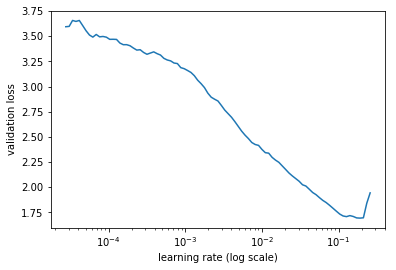

In [53]:
m.sched.plot()

In [54]:
m = md.get_learner(emb_szs, 
                   len(df.columns)-len(cat_vars),
                   0., 1, layers, [0.1, 0.2, 0.], yl_range, use_bn=False)

lr = 1e-2
m.fit(lr, 4, metrics=[exp_rmspe, exp_mae], cycle_len=100)
#m.fit(lr, 4, metrics=[exp_rmspe], cycle_len=3)



epoch      trn_loss   val_loss   exp_rmspe  exp_mae          
    0      2.660192   2.490218   3.964653   2005.206198
    1      1.089568   0.750979   1.369306   1193.095657      
    2      0.70858    0.452517   1.274226   921.788833        
    3      0.595296   0.404664   1.211653   868.50892         
    4      0.53994    0.328473   1.358441   803.72144         
    5      0.692559   0.29836    1.267277   715.673359        
    6      0.446526   0.351733   2.119924   785.220326        
    7      0.375063   0.321725   1.084114   676.688073        
    8      0.361521   0.312218   1.039199   791.02316         
    9      0.351778   0.324966   0.911844   651.824309        
    10     0.338925   0.379143   1.167313   800.598283        
    11     0.330143   0.372968   1.739831   702.270018        
    12     0.317784   0.298535   1.384014   621.791197        
    13     0.318075   0.368573   1.838248   619.601357        
    14     0.325878   0.320215   0.989754   813.814334        
 

   128     0.242778   0.290192   1.036658   606.958481        
   129     0.227863   0.332138   0.863678   585.739671        
   130     0.228002   0.301997   0.96429    602.292377        
   131     0.221727   0.271771   1.103475   678.300093        
   132     0.218466   0.296135   0.941744   588.908252        
   133     0.213697   0.325354   1.028135   608.845098        
   134     0.204913   0.323564   1.178186   777.643679        
   135     0.209435   0.325398   1.096345   623.026627        
   136     0.203505   0.340386   1.267468   842.339215        
   137     0.199812   0.313072   1.213393   715.670622        
   138     0.20573    0.333029   1.457274   659.719356        
   139     0.196977   0.320726   1.226158   658.554611        
   140     0.198372   0.311705   1.382657   752.427896        
   141     0.196026   0.334587   1.099276   827.027278        
   142     0.193453   0.36666    1.02984    630.571757        
   143     0.190469   0.426274   0.998881   604.641278 

   258     0.156718   0.325271   1.107182   559.839538        
   259     0.155027   0.365541   1.22588    860.109532        
   260     0.15631    0.338328   1.135984   677.549089        
   261     0.157208   0.350322   1.29078    756.965597        
   262     0.149481   0.359461   1.276632   654.330561        
   263     0.151934   0.329778   0.990303   524.195588        
   264     0.148688   0.351367   1.23481    574.081963        
   265     0.145536   0.328006   1.290478   616.625956        
   266     0.151596   0.335092   1.264719   568.598651        
   267     0.15058    0.354364   1.52598    593.048696        
   268     0.149527   0.332803   1.407435   528.016875        
   269     0.145237   0.335705   1.514904   584.861044        
   270     0.139779   0.33984    1.43833    579.560371       
   271     0.139994   0.349808   1.482183   617.378868        
   272     0.140602   0.340021   1.254458   618.661061        
   273     0.138013   0.353844   1.452592   576.7991    

   388     0.129946   0.306763   0.965643   555.09989         
   389     0.135588   0.304903   0.98817    533.504065        
   390     0.126315   0.302448   1.000445   534.297692       
   391     0.134702   0.30189    0.99513    539.101469        
   392     0.134942   0.304457   0.977973   539.965672        
   393     0.132417   0.304344   0.981662   542.447021        
   394     0.129901   0.303467   0.997735   545.08609         
   395     0.130309   0.304471   0.988212   537.873847        
   396     0.134535   0.30365    0.996537   538.859481        
   397     0.132878   0.303575   0.996239   537.656026        
   398     0.137953   0.30365    0.994851   537.412444        
   399     0.126497   0.303664   0.994753   537.407639        



[array([0.30366]), 0.9947525387465437, 537.4076385278396]

In [ ]:
m.fit(lr, 100, metrics=[exp_rmspe, exp_mae], cycle_len=3)

In [55]:
y_hat,y=np.exp(m.predict_with_targs())

In [56]:
z = np.array(list(zip(y_hat, y)))

z


array([[[1566.3024 ],
        [1977.9998 ]],

       [[2439.7705 ],
        [3896.001  ]],

       [[3503.6082 ],
        [3947.0005 ]],

       [[3828.6956 ],
        [3985.0005 ]],

       [[4903.299  ],
        [5431.9985 ]],

       [[4841.831  ],
        [6656.9976 ]],

       [[4796.882  ],
        [6212.998  ]],

       [[5465.635  ],
        [5940.998  ]],

       [[2713.0518 ],
        [3138.0005 ]],

       [[3810.3296 ],
        [3623.9993 ]],

       [[4117.6235 ],
        [4202.001  ]],

       [[4238.295  ],
        [5255.0015 ]],

       [[4483.9746 ],
        [5277.9995 ]],

       [[5948.033  ],
        [6519.001  ]],

       [[4670.8604 ],
        [4773.0024 ]],

       [[3884.122  ],
        [3808.0012 ]],

       [[2288.4817 ],
        [4507.9985 ]],

       [[3771.6277 ],
        [5443.0024 ]],

       [[4791.5825 ],
        [6282.9985 ]],

       [[5289.7256 ],
        [5419.9985 ]],

       ...,

       [[  67.65652],
        [  57.     ]],

       [[  73.41962],

In [57]:
facility_payments = []
for idx in val_idx:
    p = payments.loc[idx]
    if (p.facility == 500165):
        facility_payments.append(p.amount)
        
len(facility_payments)
facility_payments



[3896.0,
 3947.0,
 3985.0,
 5432.0,
 6657.0,
 6213.0,
 5941.0,
 3138.0,
 3624.0,
 4202.0,
 5255.0,
 5278.0,
 6519.0,
 4773.0,
 3808.0]

In [58]:
z[1:9]

array([[[2439.7705],
        [3896.001 ]],

       [[3503.6082],
        [3947.0005]],

       [[3828.6956],
        [3985.0005]],

       [[4903.299 ],
        [5431.9985]],

       [[4841.831 ],
        [6656.9976]],

       [[4796.882 ],
        [6212.998 ]],

       [[5465.635 ],
        [5940.998 ]],

       [[2713.0518],
        [3138.0005]]], dtype=float32)

In [ ]:
np.exp(m.predict())